# Tree Node Graph

In [1]:
import networkx as nx
graph = nx.DiGraph()
graph.add_node(1, time='5pm')
graph.add_node(2, time='2pm')
graph.add_node(3, time='1pm')

In [2]:
graph.add_edge(1,2)
graph.add_edge(1,3)

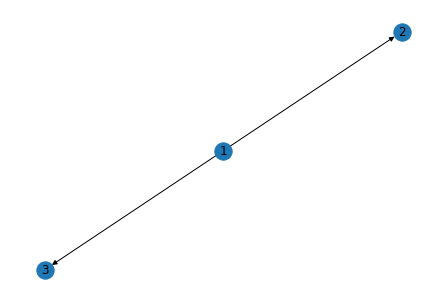

In [3]:
import matplotlib.pyplot as plt
nx.draw(graph, with_labels = True)

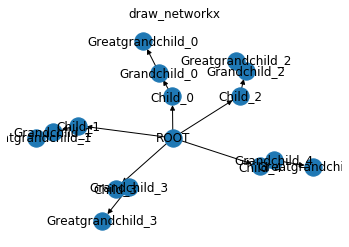

In [4]:
import networkx as nx

graph = nx.DiGraph()

graph.add_node("ROOT")

for i in range(5):
    graph.add_node("Child_%i" % i)
    graph.add_node("Grandchild_%i" % i)
    graph.add_node("Greatgrandchild_%i" % i)

    graph.add_edge("ROOT", "Child_%i" % i)
    graph.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    graph.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)


# same layout using matplotlib with no labels
plt.title('draw_networkx')
nx.draw(graph,with_labels = True)

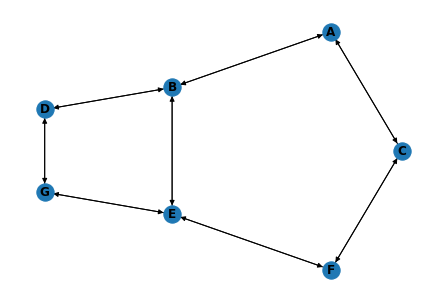

In [2]:
import networkx as nx
class Nodo:
    def __init__(self,nodo,nodosVecinos=None):
        self.nodo=nodo
        self.nodoPadre=None
    def __str__(self):
        return self.nodo
class FabricaNodos:
    def __init__(self):
        A = Nodo("A")
        B = Nodo("B")
        C = Nodo("C")
        D = Nodo("D")
        E = Nodo("E")
        F = Nodo("F")
        G = Nodo("G")
        A.nodosVecinos = [A,B,C]
        B.nodosVecinos = [A,B,D,E]
        C.nodosVecinos = [A,F]
        D.nodosVecinos = [B,G]
        E.nodosVecinos = [B,F,G]
        F.nodosVecinos = [C,E]
        G.nodosVecinos = [D,E]
        grafico = {
            A:A.nodosVecinos,
            B:B.nodosVecinos,
            C:C.nodosVecinos,
            D:D.nodosVecinos,
            E:E.nodosVecinos,
            F:F.nodosVecinos,
            G:G.nodosVecinos    
        }
        self.A=A
        self.B=B
        self.C=C
        self.D=D
        self.E=E
        self.F=F
        self.G=G  
        self.grafico = grafico
f = FabricaNodos()
node_graph=nx.DiGraph(f.grafico)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold')

{<__main__.Nodo at 0x271570770c8>: [<__main__.Nodo at 0x271570770c8>,
 <__main__.Nodo at 0x271575d5d48>: [<__main__.Nodo at 0x271570770c8>,
 <__main__.Nodo at 0x271575d5dc8>: [<__main__.Nodo at 0x271575d5d48>,
 <__main__.Nodo at 0x271575d5e88>: [<__main__.Nodo at 0x271575d5dc8>,
 <__main__.Nodo at 0x271575d5e08>: [<__main__.Nodo at 0x271575d5d48>,
 <__main__.Nodo at 0x271575d5e48>: [<__main__.Nodo at 0x271575d5d88>,
 <__main__.Nodo at 0x271575d5d88>: [<__main__.Nodo at 0x271570770c8>,
  <__main__.Nodo at 0x271575d5e48>]}

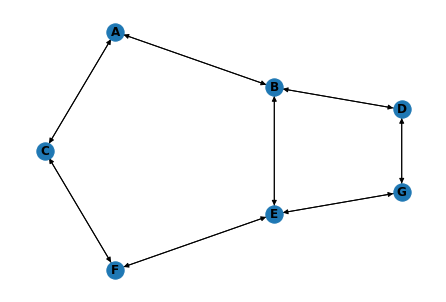

In [3]:
def crear_diccinario(nodo,figura,nodoVisitado):
        if not nodo:
            return -1
        else:        
            if not nodo in nodoVisitado:
                figura[nodo] = nodo.nodosVecinos
                nodoVisitado.append(nodo)
                for nodoVecino in nodo.nodosVecinos:
                    crear_diccinario(nodoVecino,figura,nodoVisitado)
f = FabricaNodos()
figura={}
crear_diccinario(f.A,figura,[])
display(figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

In [7]:
def crear_diccionario_padre(nodo,figura):
    if not nodo.nodoPadre:
        return -1
    else:
        figura[nodo.nodoPadre]=[nodo]
        crear_diccionario_padre(nodo.nodoPadre,figura)

In [1]:
def buscar_nodo_base(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[]    
    nodosAbiertos.append(nodoInicial)
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)            
        if nodo == nodoMeta:
            print('META')
            return nodo
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)            
            for nodoVecino in nodo.nodosVecinos:
                if not nodoVecino in nodosVisitados: 
                    print("V-"+nodoVecino.nodo)
                    print("P-"+nodo.nodo)
                    nodoVecino.nodoPadre = nodo                
                    nodosAbiertos.append(nodoVecino)
    return False
f = FabricaNodos()
nodoMeta = buscar_nodo_base(f.A,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 


NameError: name 'FabricaNodos' is not defined

V-B
P-A
V-C
P-A
V-D
P-B
V-E
P-B
V-F
P-C
V-G
P-D
V-F
P-E
V-G
P-E
META


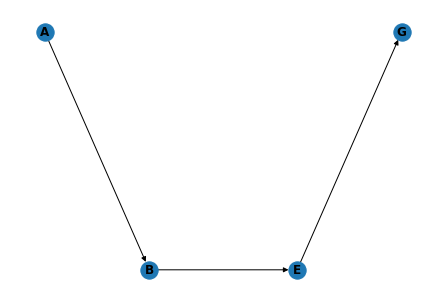

In [9]:
def buscar_nodo(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[]    
    nodosAbiertos.append(nodoInicial)
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)            
        if nodo == nodoMeta:
            print('META')
            return nodo
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)            
            for nodoVecino in nodo.nodosVecinos:
                if not nodoVecino in nodosVisitados: 
                    print("V-"+nodoVecino.nodo)
                    print("P-"+nodo.nodo)
                    nodoVecino.nodoPadre = nodo                
                    nodosAbiertos.append(nodoVecino)
    return False
f = FabricaNodos()
nodoMeta = buscar_nodo(f.A,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

V-B
P-A
V-C
P-A
V-D
P-B
V-E
P-B
V-F
P-C
V-G
P-D
META


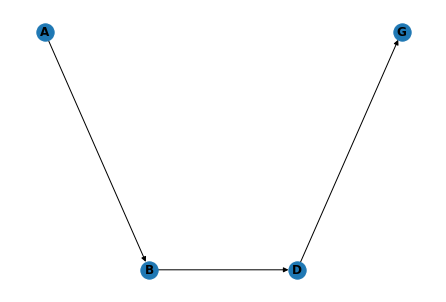

In [10]:
def buscar_nodo_vec(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[]
    nodosAbiertos.append(nodoInicial)    
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)                    
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)            
            for nodoVecino in nodo.nodosVecinos:
                if not nodoVecino in nodosVisitados:                    
                    print("V-"+nodoVecino.nodo)
                    print("P-"+nodo.nodo)
                    if not nodoVecino.nodoPadre:
                        nodoVecino.nodoPadre = nodo     
                    if nodoVecino == nodoMeta:
                        print('META')
                        return nodoVecino
                    nodosAbiertos.append(nodoVecino)
    return False
f = FabricaNodos()
nodoMeta = buscar_nodo_vec(f.A,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

V-A
P-C
V-F
P-C
V-B
P-A
V-E
P-F
V-D
P-B
V-E
P-B
V-G
P-E
META


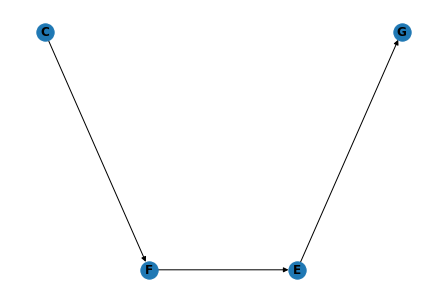

In [11]:
f = FabricaNodos()
nodoMeta = buscar_nodo_vec(f.C,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

V-C
P-F
V-E
P-F
V-A
P-C
V-B
P-E
META


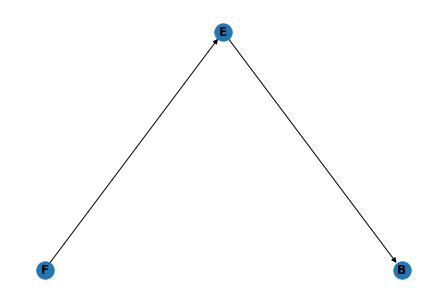

In [12]:
f = FabricaNodos()
nodoMeta = buscar_nodo_vec(f.F,f.B) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

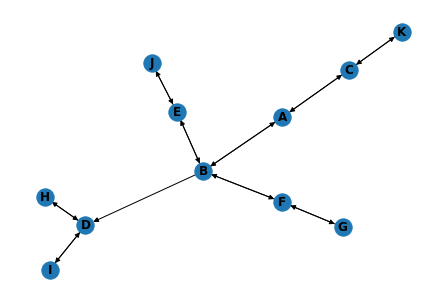

In [13]:
class FabricaNodosProf:
    def __init__(self):
        A = Nodo("A")
        B = Nodo("B")
        C = Nodo("C")
        D = Nodo("D")
        E = Nodo("E")
        F = Nodo("F")
        G = Nodo("G")
        H = Nodo("H")
        I = Nodo("I")
        J = Nodo("J")
        K = Nodo("K")
        A.nodosVecinos = [A,B,C]
        B.nodosVecinos = [A,D,E,F]
        C.nodosVecinos = [A,K]
        D.nodosVecinos = [H,I]
        E.nodosVecinos = [B,J]
        F.nodosVecinos = [B,G]
        G.nodosVecinos = [F]
        H.nodosVecinos = [D]
        I.nodosVecinos = [D]
        J.nodosVecinos = [E]
        K.nodosVecinos = [C]
        grafico = {
            A:A.nodosVecinos,
            B:B.nodosVecinos,
            C:C.nodosVecinos,
            D:D.nodosVecinos,
            E:E.nodosVecinos,
            F:F.nodosVecinos,
            G:G.nodosVecinos,    
            H:H.nodosVecinos,
            I:I.nodosVecinos,
            J:J.nodosVecinos,
            K:K.nodosVecinos            
        }
        self.A=A
        self.B=B
        self.C=C
        self.D=D
        self.E=E
        self.F=F
        self.G=G  
        self.H=H
        self.I=I
        self.J=J
        self.K=K
        self.grafico = grafico
f = FabricaNodosProf()
figura={}
crear_diccinario(f.A,figura,[])
node_graph=nx.DiGraph(figura)
nx.draw(node_graph,with_labels=True, font_weight='bold') 

V-B
P-A
V-D
P-B
V-H
P-D
V-I
P-D
V-E
P-B
V-J
P-E
V-F
P-B
V-G
P-F
META


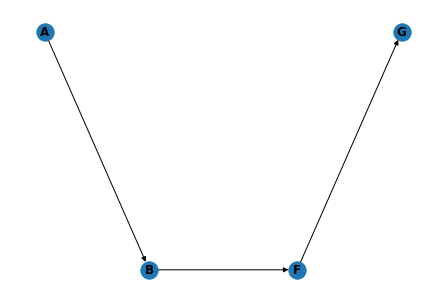

In [14]:
def buscar_nodo_prof(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[]
    nodosAbiertos.insert(0,nodoInicial)      
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)       
        if nodo == nodoMeta:
            print('META')
            return nodo                
        nodosVisitados.append(nodo)     
        existeVecinosNoVisitados = False
        for nodoVecino in nodo.nodosVecinos:                
            if not nodoVecino in nodosVisitados:                    
                existeVecinosNoVisitados = True
                print("V-"+nodoVecino.nodo)
                print("P-"+nodo.nodo)
                nodoVecino.nodoPadre = nodo                         
                nodosAbiertos.insert(0,nodoVecino)
                break
        if not existeVecinosNoVisitados:            
            nodosAbiertos.insert(0,nodo.nodoPadre)                
    return None
f = FabricaNodosProf()
nodoMeta = buscar_nodo_prof(f.A,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

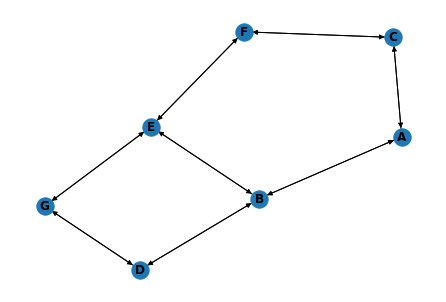

In [90]:
class Nodo:
    def __init__(self,nodo,nodosVecinos=None,costos=None,peso=0):
        self.nodo=nodo
        self.nodoPadre=None
        self.costos = costos
        self.peso=0    
    def __str__(self):
        return self.nodo
class FabricaNodosCostos:
    def __init__(self):
        A = Nodo("A")
        B = Nodo("B")
        C = Nodo("C")
        D = Nodo("D")
        E = Nodo("E")
        F = Nodo("F")
        G = Nodo("G")
        A.nodosVecinos = [B,C]
        A.costos = [100,10]
        B.nodosVecinos = [A,D,E]
        B.costos = [100,10,5]
        C.nodosVecinos = [A,F]
        C.costos = [10,10]
        D.nodosVecinos = [B,G]
        D.costos = [10,20]
        E.nodosVecinos = [B,F,G]
        E.costos = [5,15,40]
        F.nodosVecinos = [C,E]
        F.costos = [10,15]
        G.nodosVecinos = [D,E]
        G.costos = [20,40]
        grafico = {
            A:A.nodosVecinos,
            B:B.nodosVecinos,
            C:C.nodosVecinos,
            D:D.nodosVecinos,
            E:E.nodosVecinos,
            F:F.nodosVecinos,
            G:G.nodosVecinos    
        }
        self.A=A
        self.B=B
        self.C=C
        self.D=D
        self.E=E
        self.F=F
        self.G=G  
        self.grafico = grafico
f = FabricaNodosCostos()
figura={}
crear_diccinario(f.A,figura,[])
node_graph=nx.DiGraph(figura)
nx.draw(node_graph,with_labels=True, font_weight='bold') 

In [16]:
arr=[1,4,3,5]
indicesCostos=sorted(enumerate(arr), key=lambda x: x[1])
for indice,valor in indicesCostos:
    print(indice,valor)
print(indicesCostos)

0 1
2 3
1 4
3 5
[(0, 1), (2, 3), (1, 4), (3, 5)]


In [17]:
def sumar_costo_nodos(nodo):        
    costoTotal = 0
    while nodo:
        nodoPadre = nodo.nodoPadre
        if nodoPadre is None:
            break        
        indice = 0        
        for nodoVecino in nodoPadre.nodosVecinos:            
            if nodoVecino == nodo:
                print(nodo)
                costoTotal+=nodoPadre.costos[indice]
            indice=indice+1
        nodo = nodoPadre
    return costoTotal    

In [18]:
A = Nodo("A")
B = Nodo("B")
C = Nodo("C")
D = Nodo("D")
A.nodosVecinos = [B,C]
A.costos = [2,5]
B.nodosVecinos = [A,D]
B.costos = [2,8]
C.nodosVecinos = [A]
C.costos = [5]
D.nodosVecinos = [B]
D.costos = [8]
sa=sumar_costo_nodos(A)
print(sa)
B.nodoPadre=A
sab=sumar_costo_nodos(B)
print(sab)
C.nodoPadre=A
sac=sumar_costo_nodos(C)
print(sac)
D.nodoPadre=B
sabd=sumar_costo_nodos(D)
print(sabd)

0
B
2
C
5
D
B
10


In [95]:
def buscar_nodo_vec_costo(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[]
    nodosAbiertos.append(nodoInicial)    
    while nodosAbiertos:
        print('Pesos')
        for nodoA in nodosAbiertos:            
            print(nodoA.peso)
        nodo=nodosAbiertos.pop(0)         
        if nodo == nodoMeta:
            print('META')
            return nodo
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)     
            indice = 0
            pesoNuevo = 0
            for nodoVecino in nodo.nodosVecinos:
                pesoNuevo = nodo.peso+nodo.costos[indice]
                indice=indice+1
                mayorPeso = 0
                if nodosAbiertos:                    
                    mayorPeso = nodosAbiertos[-1].peso
                if pesoNuevo > mayorPeso:
                    print('pesoAnterior',mayorPeso)
                    print('pesoNuevo',pesoNuevo)
                    if not nodoVecino in nodosVisitados:                    
                        print("V1-"+nodoVecino.nodo)
                        print("P1-"+nodo.nodo)
                        if not nodoVecino.nodoPadre:
                            nodoVecino.nodoPadre = nodo                             
                        nodoVecino.peso = pesoNuevo
                        nodosAbiertos.append(nodoVecino)                    
                else:                    
                    print('FpesoAnterior',mayorPeso)
                    print('FpesoNuevo',pesoNuevo)
                    if not nodoVecino in nodosVisitados:                    
                        print("V-"+nodoVecino.nodo)
                        print("P-"+nodo.nodo)
                        if not nodoVecino.nodoPadre:
                            nodoVecino.nodoPadre = nodo                             
                        nodoVecino.peso = pesoNuevo
                        nodosAbiertos.insert(0,nodoVecino)
    return False

Pesos
0
pesoAnterior 0
pesoNuevo 100
V1-B
P1-A
FpesoAnterior 100
FpesoNuevo 10
V-C
P-A
Pesos
10
100
FpesoAnterior 100
FpesoNuevo 20
FpesoAnterior 100
FpesoNuevo 20
V-F
P-C
Pesos
20
100
FpesoAnterior 100
FpesoNuevo 30
FpesoAnterior 100
FpesoNuevo 35
V-E
P-F
Pesos
35
100
FpesoAnterior 100
FpesoNuevo 40
V-B
P-E
pesoAnterior 40
pesoNuevo 50
pesoAnterior 40
pesoNuevo 75
V1-G
P1-E
Pesos
40
40
75
pesoAnterior 75
pesoNuevo 140
FpesoAnterior 75
FpesoNuevo 50
V-D
P-B
FpesoAnterior 75
FpesoNuevo 45
Pesos
50
40
75
FpesoAnterior 75
FpesoNuevo 60
FpesoAnterior 75
FpesoNuevo 70
V-G
P-D
Pesos
70
40
70
META


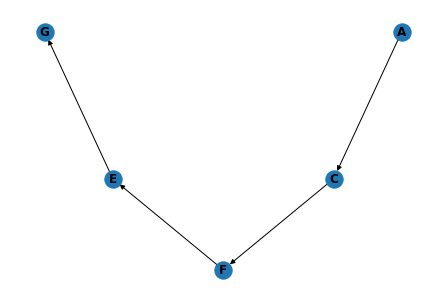

In [96]:
f = FabricaNodosCostos()
nodoMeta = buscar_nodo_vec_costo(f.A,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

In [81]:
class Nodo:
    def __init__(self,nodo,nodosVecinos=None,costos=None,peso=0):
        self.nodo=nodo
        self.nodoPadre=None
        self.costos = costos
        self.peso=0    
    def __str__(self):
        return self.nodo
class FabricaNodosCostos:
    def __init__(self):
        A = Nodo("A")
        B = Nodo("B")
        C = Nodo("C")
        D = Nodo("D")
        E = Nodo("E")
        F = Nodo("F")
        G = Nodo("G")
        A.nodosVecinos = [B,C]
        A.costos = [100,10]
        B.nodosVecinos = [A,D,E]
        B.costos = [100,10,5]
        C.nodosVecinos = [A,F]
        C.costos = [10,10]
        D.nodosVecinos = [B,G]
        D.costos = [10,20]
        E.nodosVecinos = [B,F,G]
        E.costos = [5,15,400]
        F.nodosVecinos = [C,E]
        F.costos = [10,15]
        G.nodosVecinos = [D,E]
        G.costos = [20,400]
        grafico = {
            A:A.nodosVecinos,
            B:B.nodosVecinos,
            C:C.nodosVecinos,
            D:D.nodosVecinos,
            E:E.nodosVecinos,
            F:F.nodosVecinos,
            G:G.nodosVecinos    
        }
        self.A=A
        self.B=B
        self.C=C
        self.D=D
        self.E=E
        self.F=F
        self.G=G  
        self.grafico = grafico

peso 0
V1-B
P1-A
V-C
P-A
V-F
P-C
V-E
P-F
V-B
P-E
peso 40
peso 40
V1-G
P1-E
V-D
P-B
V-G
P-D
META


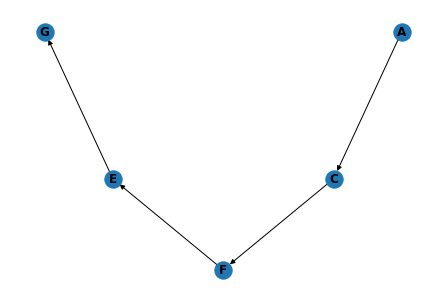

In [82]:
f = FabricaNodosCostos()
nodoMeta = buscar_nodo_vec_costo(f.A,f.G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 